<a href="https://colab.research.google.com/github/ATIK2110018/ML_projects/blob/main/feni_flood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/balanced_flood (1).csv')

In [ ]:
df.head(5)

,CID,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood,POINT_X,POINT_Y
0,0,9.0,176.251099,1.0,64.0,0.0,0.000000,NaN,0.423457,373.500000,456.946381,1237.111939,1.0,338491.5452,2538443.055
1,0,7.0,218.475159,2.0,16.0,2.0,3.913395,3.37541,0.480865,375.700151,42.426407,3534.238281,1.0,347346.0141,2533549.808
2,0,19.0,171.052978,2.0,16.0,0.0,4.228262,NaN,0.636298,373.000000,67.082039,6800.618164,1.0,346907.9750,2556930.271
3,0,10.0,218.342468,2.0,64.0,0.0,1.263793,NaN,0.493061,378.500000,120.000000,3550.468018,0.0,327966.3062,2543219.401
4,0,10.0,218.342468,2.0,4.0,0.0,1.263793,NaN,0.598888,374.000000,593.969727,1048.792969,0.0,327724.2705,2539826.363


In [ ]:
df.shape

(3388, 15)

In [ ]:
df.isnull().sum()

,0
CID,0
elevation,0
precipitation,3
lulc,9
flow_dir,0
flow_accu,0
slope,15
twi,1995
ndvi,0
permeability,0


In [ ]:
df['twi']=df['twi'].fillna(0)
df['river_dist']=df['river_dist'].fillna(df['river_dist'].mean)
df['elevation']=df['elevation'].fillna(df['elevation'].mean)
df['precipitation']=df['precipitation'].fillna(df['precipitation'].mean)
df['lulc']=df['lulc'].fillna(1)
df['flow_dir']=df['flow_dir'].fillna(2)
df['slope']=df['slope'].fillna(df['slope'].mean)
df['flow_accu']=df['flow_accu'].fillna(df['flow_accu'].mean)
df['ndvi']=df['ndvi'].fillna(df['ndvi'].mean)
df['drainage_den']=df['drainage_den'].fillna(df['drainage_den'].mean)
df['flood']=df['flood'].fillna(0)

In [ ]:
df.isnull().sum()

,0
CID,0
elevation,0
precipitation,0
lulc,0
flow_dir,0
flow_accu,0
slope,0
twi,0
ndvi,0
permeability,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CID            3388 non-null   int64  
 1   elevation      3388 non-null   float64
 2   precipitation  3388 non-null   object 
 3   lulc           3388 non-null   float64
 4   flow_dir       3388 non-null   float64
 5   flow_accu      3388 non-null   float64
 6   slope          3388 non-null   object 
 7   twi            3388 non-null   float64
 8   ndvi           3388 non-null   float64
 9   permeability   3388 non-null   float64
 10  river_dist     3388 non-null   object 
 11  drainage_den   3388 non-null   object 
 12  flood          3388 non-null   float64
 13  POINT_X        3388 non-null   float64
 14  POINT_Y        3388 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 397.2+ KB


In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

print(df.dtypes)

Index(['precipitation', 'slope', 'river_dist', 'drainage_den'], dtype='object')
CID                int64
elevation        float64
precipitation    float64
lulc             float64
flow_dir         float64
flow_accu        float64
slope            float64
twi              float64
ndvi             float64
permeability     float64
river_dist       float64
drainage_den     float64
flood            float64
POINT_X          float64
POINT_Y          float64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CID            3388 non-null   int64  
 1   elevation      3388 non-null   float64
 2   precipitation  3388 non-null   float64
 3   lulc           3388 non-null   float64
 4   flow_dir       3388 non-null   float64
 5   flow_accu      3388 non-null   float64
 6   slope          3388 non-null   float64
 7   twi            3388 non-null   float64
 8   ndvi           3388 non-null   float64
 9   permeability   3388 non-null   float64
 10  river_dist     3388 non-null   float64
 11  drainage_den   3388 non-null   float64
 12  flood          3388 non-null   float64
 13  POINT_X        3388 non-null   float64
 14  POINT_Y        3388 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 397.2 KB


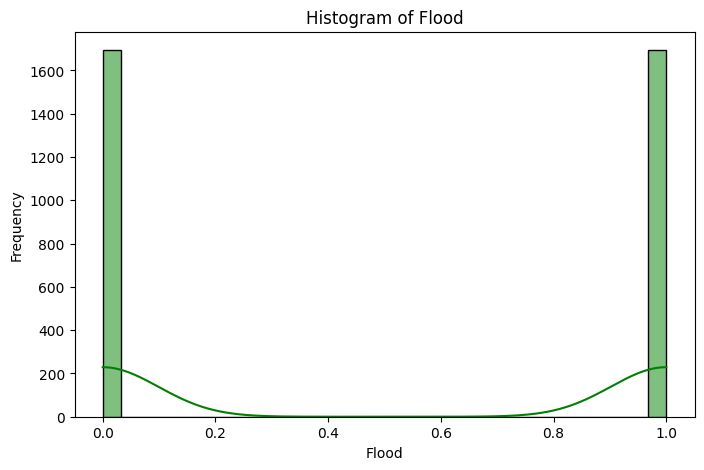

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['flood'], bins=30, kde=True, color='green')
plt.xlabel("Flood")
plt.ylabel("Frequency")
plt.title("Histogram of Flood")
plt.show()

In [ ]:
df.isnull().sum()


,0
CID,0
elevation,0
precipitation,0
lulc,0
flow_dir,0
flow_accu,0
slope,0
twi,0
ndvi,0
permeability,0


In [ ]:
df.describe()

,CID,elevation,precipitation,lulc,flow_dir,flow_accu,slope,twi,ndvi,permeability,river_dist,drainage_den,flood,POINT_X,POINT_Y
count,3388.0,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3.388000e+03
mean,0.0,10.350354,188.140322,1.757969,26.210449,171.953070,1.164513,2.450172,0.495823,375.554877,556.957638,2121.194569,0.500000,337993.540185,2.544178e+06
std,0.0,3.036882,21.164726,0.724846,33.386168,1490.901467,1.098914,3.297002,0.146020,3.551836,416.396949,1722.604460,0.500074,7211.583761,1.252025e+04
min,0.0,0.000000,144.887833,1.000000,1.000000,0.000000,0.000000,0.000000,-0.354639,361.500000,0.000000,0.000000,0.000000,320533.912200,2.516942e+06
25%,0.0,9.000000,171.052978,1.000000,4.000000,0.000000,0.350566,0.000000,0.425023,373.500000,228.473190,857.112106,0.000000,332934.583125,2.535500e+06
50%,0.0,10.000000,184.256561,2.000000,16.000000,2.000000,0.991463,0.000000,0.517314,375.000000,466.690491,1910.306763,0.500000,338473.530250,2.543056e+06
75%,0.0,12.000000,202.448410,2.000000,32.000000,9.000000,1.786984,4.912942,0.601035,377.500000,810.000000,2869.406616,1.000000,343465.596100,2.551867e+06
max,0.0,36.000000,246.633606,3.000000,128.000000,43454.000000,15.011990,14.937948,0.777361,389.500000,2510.338623,11514.011720,1.000000,354346.312300,2.574361e+06


In [ ]:
df=df.drop(columns=['CID','POINT_X','POINT_Y','flow_accu'],axis=1)

In [ ]:
df.head(8)

,elevation,precipitation,lulc,flow_dir,slope,twi,ndvi,permeability,river_dist,drainage_den,flood
0,9.0,176.251099,1.0,64.0,0.000000,0.000000,0.423457,373.500000,456.946381,1237.111939,1.0
1,7.0,218.475159,2.0,16.0,3.913395,3.375410,0.480865,375.700151,42.426407,3534.238281,1.0
2,19.0,171.052978,2.0,16.0,4.228262,0.000000,0.636298,373.000000,67.082039,6800.618164,1.0
3,10.0,218.342468,2.0,64.0,1.263793,0.000000,0.493061,378.500000,120.000000,3550.468018,0.0
4,10.0,218.342468,2.0,4.0,1.263793,0.000000,0.598888,374.000000,593.969727,1048.792969,0.0
5,9.0,153.560196,1.0,8.0,1.752304,8.323263,0.590169,374.000000,466.690491,2406.435303,0.0
6,7.0,194.800140,1.0,64.0,0.000000,0.000000,0.504455,377.000000,30.000000,2577.956299,0.0
7,9.0,205.867493,1.0,64.0,0.000000,0.000000,0.376426,365.000000,366.196655,1116.376221,1.0


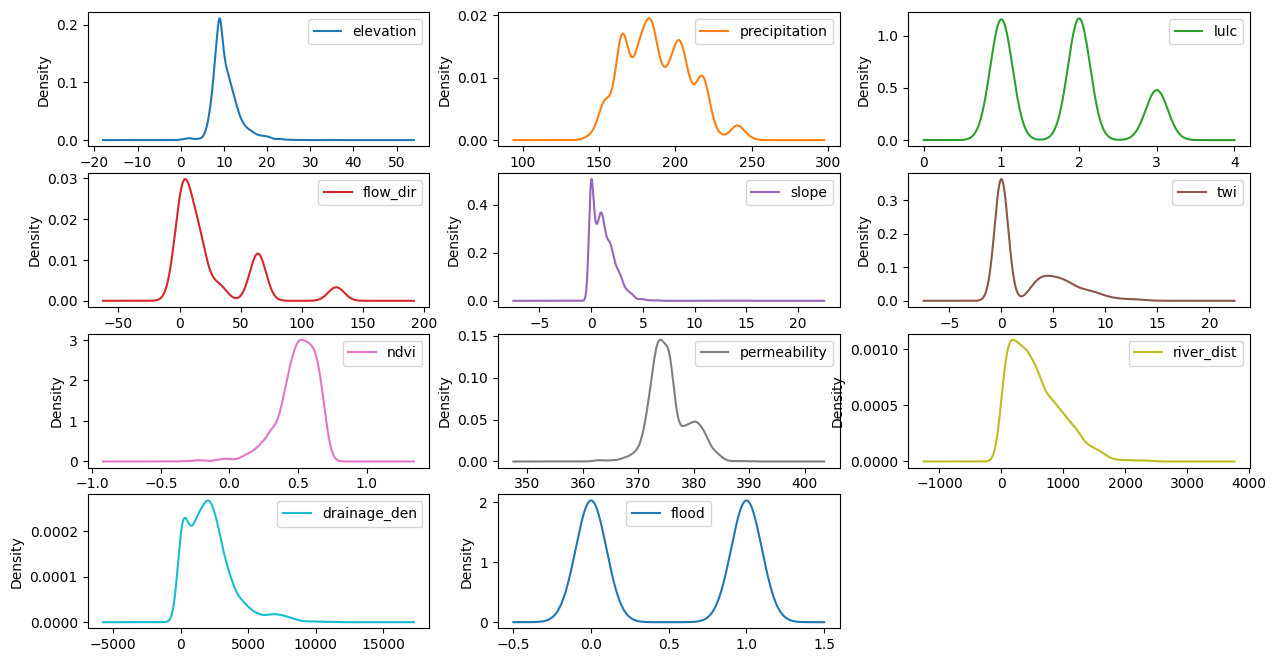

In [ ]:
df.plot(kind='density',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

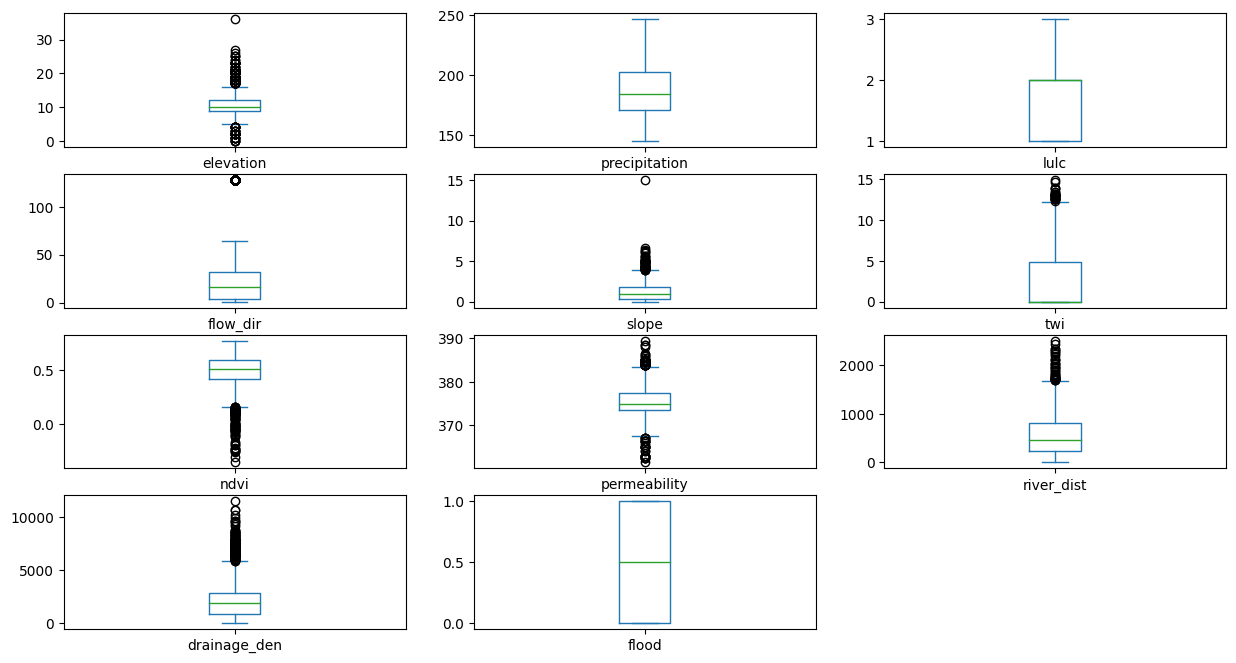

In [ ]:
df.plot(kind='box',figsize=(15,8),subplots=True,layout=(4,3),sharex=False)
plt.show()

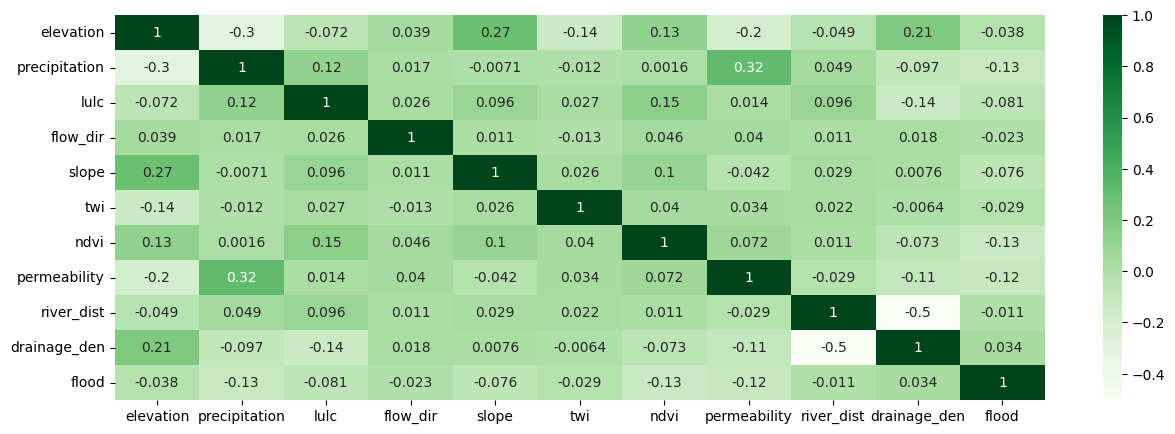

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
setup(df,target='flood',session_id = 123)

,Description,Value
0,Session id,123
1,Target,flood
2,Target type,Binary
3,Original data shape,"(3388, 11)"
4,Transformed data shape,"(3388, 11)"
5,Transformed train set shape,"(2371, 11)"
6,Transformed test set shape,"(1017, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6267,0.6581,0.6154,0.6308,0.6221,0.2534,0.2541,0.6590
gbc,Gradient Boosting Classifier,0.6200,0.6577,0.6188,0.6222,0.6194,0.2399,0.2409,0.6220
et,Extra Trees Classifier,0.6162,0.6571,0.5952,0.6219,0.6077,0.2323,0.2329,0.3620
ada,Ada Boost Classifier,0.6086,0.6356,0.6062,0.6114,0.6075,0.2172,0.2180,0.1820
qda,Quadratic Discriminant Analysis,0.6069,0.6284,0.5817,0.6128,0.5962,0.2138,0.2145,0.0290
nb,Naive Bayes,0.6048,0.6229,0.5986,0.6071,0.6019,0.2096,0.2103,0.0560
lda,Linear Discriminant Analysis,0.6048,0.6356,0.6146,0.6042,0.6080,0.2096,0.2106,0.0280
lightgbm,Light Gradient Boosting Machine,0.6048,0.6403,0.6028,0.6064,0.6038,0.2095,0.2100,0.2770
ridge,Ridge Classifier,0.6031,0.6356,0.6146,0.6021,0.6069,0.2062,0.2072,0.0910
xgboost,Extreme Gradient Boosting,0.5997,0.6242,0.5927,0.6019,0.5967,0.1993,0.1997,0.1500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6218,0.6911,0.6975,0.6058,0.6484,0.2437,0.2465
1,0.6498,0.7054,0.6356,0.6522,0.6438,0.2995,0.2996
2,0.6203,0.6488,0.5169,0.6489,0.5755,0.2398,0.2449
3,0.5738,0.5891,0.5847,0.5702,0.5774,0.1478,0.1478
4,0.6287,0.6760,0.6525,0.6210,0.6364,0.2575,0.2579
5,0.5907,0.6142,0.6303,0.5859,0.6073,0.1812,0.1817
6,0.6287,0.6604,0.6134,0.6348,0.6239,0.2575,0.2576
7,0.6371,0.6747,0.6050,0.6486,0.6261,0.2745,0.2751
8,0.6540,0.7062,0.7143,0.6391,0.6746,0.3077,0.3098


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
